In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
FILE_X = 'data/linearX.csv'
FILE_Y = 'data/linearY.csv'

In [19]:
lrate = 0.0001
numitr = 10
losslim = 0.00012

In [20]:
datax = np.genfromtxt(FILE_X, delimiter=',')
datay = np.genfromtxt(FILE_Y, delimiter=',')

In [21]:
#preprocess X
sft = np.mean(datax)
div = np.var(datax) ** 0.5

datax = (datax - sft)/div

In [40]:
# batch wise learning
p = np.zeros(2).astype(float)
loss = 100
es = []
p0s = []
p1s = []
# fig = plt.figure()
while loss > losslim:
    loss = 0
    jvals = []
    dp = np.zeros_like(p).astype(float)
    for i in range(0,len(datax)):
        hx = np.matmul(p,[1,datax[i]])
        error = hx - datay[i]
        jvals.append((error**2)/2)
        loss += (error**2)/2
        delta = error*np.asarray([1,datax[i]])
        dp += lrate*delta
#     ax = plt.figure().add_subplot(111, projection='3d')
    es.append(loss/len(datax))
    p0s.append(p[0])
    p1s.append(p[1])
#     ax.plot(p0s, p1s, es)
#     plt.show()
#     time.sleep(0.1)
#     print(loss/len(datax))
    dp = dp
    p -= dp
    

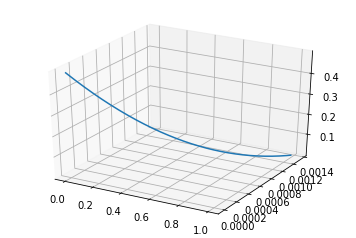

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(p0s, p1s, es)
# ax.contour(p0s,p1s,es)
plt.show()

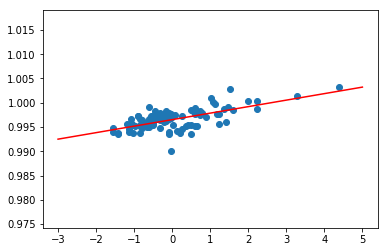

In [9]:
plt.scatter(datax,datay)
x = np.linspace(-3,5,100)
y = p[0] + p[1]*x
plt.plot(x, y, '-r')

In [ ]:
p